# Homework 2 (HW2)

---
By the end of this homework we expect you to be able to:
1. Preprocess data and make it amenable to statistical analysis and machine learning models;
2. Train and test out-of-the-box machine learning models in Python;
3. Carry out statistical hypothesis testing;
4. Carry out simple multivariate regression analyses;
5. Use techniques to control for covariates;
---

## Important Dates

- Homework release: Fri 6 Nov 2020
- **Homework due**: Fri 20 Nov 2020, 23:59
- Grade release: Mon 30 Nov 2020

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you have to justify your choice.
2. Make sure you use the data folder provided in the repository in **read-only** mode.
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation (in markdown).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master branch. If there are multiple notebooks present, we will **strictly** not grade anything.
7. Also, be sure to hand in a fully-run and evaluated notebook. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. Make sure to print results or dataframes that confirm you have properly addressed the task.
9. Lastly, the grading is done in the *double blind* mode, i.e., the TAs grades an anonymized version of your notebook, so make sure that your notebook **neither has your team name nor the names of the members**.

## Context

Publishing papers is a big part of the lives of [Ph.D. students](http://phdcomics.com/comics/archive.php?comicid=154), [post-docs](http://phdcomics.com/comics/archive.php?comicid=1744) and [professors](http://phdcomics.com/comics/archive.php?comicid=1051). 
In Computer Science, publishing happens mostly in conferences. What follows is a slight simplification of how these conferences decide which papers to accept and which papers to reject.
 
Every year, scholars submit papers to prestigious conferences. The papers are then assigned to reviewers (usually around 3), who are other people from the same research community (respect thy neighbor!). Each reviewer weighs in on whether they believe the papers they were assigned are good or bad, and write a review, often along with a score (e.g. +3 Strong Accept, +2 Accept, +1 Weak Accept, 0 Borderline, …,  -3 Strong Reject). Then, in the end, "special" reviewers called, "Area Chairs" analyze all the reviews that were written for the same paper and decide what gets accepted and what gets rejected. Importantly, throughout this whole dance, reviewers and authors are anonymous. When you're reviewing a paper, you do not know who wrote it. And when you receive the review, you don't know who reviewed it. Because of that, we call this a double-blind reviewing process.

An interesting development that has evolved in recent years is the rise of pre-prints. In previous times, researchers often exposed their research to the world only after it had been peer-reviewed and published in a conference or a journal. But recently researchers are much keener to let their ideas out into the world as soon as possible, and they publish their research before it has been approved to any conference or journal, by posting the research on so-called pre-print servers. The most common pre-print server for Computer Science, Physics, and Maths is called [arXiv](https://arxiv.org/), for Biology, an increasingly popular one is [bioRxiv](https://www.biorxiv.org/), for Psychology [psyArXiv](https://psyarxiv.com/) (they are not very creative with the names). Notice that pre-prints and peer-review are not mutually exclusive, in fact, usually, you publish your pre-print, and then you try to publish your work in a peer-reviewed setting.

Overall, publishing pre-prints has many benefits. They make science more accessible and hasten the circulation of important results in the academic community. However, a big issue brought forth with pre-prints is that they often break the anonymity in the double-blind reviewing process. For instance, in machine learning, since most papers are published as pre-prints, it is often easy to figure out if the paper you are reviewing is from a famous researcher or a big company with prominent research scientists. From critics' viewpoint, knowing the authors of the papers you are reviewing can bias your reviews. If you know that a given author is famous, you'd be more inclined to take his or her word for granted. If the author is from an institution you’ve never heard about, you are more likely to doubt his or her findings.

In this homework, we will take a data-driven deep dive into the world of academic publishing. Can you use your freshly acquired data-science skills to predict which papers are going to make the cut? Are your data analysis skills sharp enough to figure out whether the aforementioned concerns about pre-print issues are justified?


## The data

The data, whose source has been *"double-blinded"* from you, and which has been simplified a bit for the assignment, contains information about submissions to a prestigious machine learning conference called ICLR (pronounced “I-clear”). You can find the dataframe in the git repo for the homework (`./data/dataset_final.csv`). We provide a brief description of the fields you will encounter.

- `year`: year the paper has been submitted to ICLR. Notice that we provide data for three years, 2018, 2019, and 2020.


- `paper`: title of the paper.


- `authors`: names of the authors separated by ;.


- `ratings`: mean rating given to the paper by the reviewers.


- `decisions`: either Accept if the paper was accepted, or Reject otherwise.


- `institution`: institutions for each of the authors, separated by ;.


- `csranking`: ranking of the institutions according to csrankings. The better the institution, the better the rank. Notice that, if a paper has more than 1 author, this field will contain multiple values, separated by ;. For institutions that are not in csrankings, the value will be -1.


- `categories`: topical categories of the paper. Each number corresponds to a different category: (1) Theory, (2) Computer Vision, (3) Natural Language Processing, (4) Adversarial ML, (5) Generative Modeling, (7) Fairness, (8) Generalization, (9) Optimization, (10) Graphs, (11) Bayesian Methods, (0) Others. A paper may belong to multiple categories, separated by ;.


- `authors_citations`: number of citations of each one of the authors, separated by ;.


- `authors_publications`: number of publications by each one of the authors, separated by ;.


- `authors_hindex`: h-index of each one of the authors, separated by ;. The h-index is an author-level metric that measures both the productivity and citation impact of the publications of a scientist or scholar. It is the maximum value $h$ such that the given author has published $h$ papers that have each been cited at least $h$ times.


- `arxiv`: whether the paper was spotted in a pre-print server around the submission period.

Also, notice that in this dataframe, when some piece of data was not available, -1 will be used as the value. For example, companies aren't a part of csrankings, so for people who work in big companies, the values are -1 in the field csranking.


## _Step 1:_ Predicting paper ratings

The first part of this homework poses a simple question: Can you predict the ratings the paper will receive given attributes related to its authors? To answer this question, we will build an ML pipeline from scratch, preprocessing the data, training a regression model, and then evaluating it.


---

### Task 1.1

Some of the fields in the data are not very amenable to serve as input to traditional machine learning algorithms. Namely, we have some fields for which there are a varying number of values (e.g. papers with 3 authors will have 3 values in the `author_citations` field, papers with 5 authors will have 5).


Your first task is to perform some feature engineering and derive unique values for each paper which you will be able to use in your ML model. 
More specifically, you must:

1. Create 3 new fields in the dataframe corresponding to the median value of the number of citations per author, the number of publications per author, and the h-index per author. So for instance, for the row `authors_publications`, you will create an additional column, e.g. `authors_publications_median`, containing the median number of publications per author in each paper.
2. Create another field entitled `reputation` capturing how famous the last author of the paper is. Notice that the last author of the paper is usually the most senior person involved in the project. This field should equal $\log_{10}\Big(\frac{\#citations}{\#publications} + 1\Big)$. Notice that each author in the dataset has at least 1 publication, so you don't risk dividing by 0.  
3. Create two fields called `has_top_company` and `has_top_institution`. The field `has_top_company` equals 1 if the article contains an author in the following list of companies `["Facebook", "Google", "Microsoft", "Deepmind"]`, and 0 otherwise. The field `has_top_institution` equals 1 if the article contains an author in the top 10 institutions according to CSRankings.
4. **Discuss:** How did you handle -1 values in item 1.1.1? Justify your approach.

---

#### 1.1.1 ~ 1.1.3

In [1]:
### Your code here! ###
import pandas as pd
import numpy as np

data = pd.read_csv("./data/dataset_final.csv")
data.head()

# initialize the columns to be added to the dataframe
citation_median = []
publication_median = []
hindex_median = []
last_author_reputation = []
has_top_company = []
has_top_institution = []

# get the median citation
for citation in data.authors_citations:
    citation_split = list(map(int,citation.split(';'))) # split the data into seperate citations, then convert to int array
    # while there is '-1' in the data, remove '-1' (there can be multiple '-1' in one paper's author citations)
    while -1 in citation_split:   
        citation_split.remove(-1)
    citation_median.append(np.median(citation_split))   # store the median citation

# get the median publication
for publication in data.authors_publications:
    publication_split = list(map(int,publication.split(';')))
    while -1 in publication_split:
        publication_split.remove(-1)
    publication_median.append(np.median(publication_split))

# get the median hindex 
for hindex in data.authors_hindex:
    hindex_split = list(map(int,hindex.split(';')))
    while -1 in hindex_split:
        hindex_split.remove(-1)
    hindex_median.append(np.median(hindex_split))

# get the reputation of the last author
for i in range(len(data)):
    # get the citations and publications of the last author, and then use the given formula to calculate the reputation
    last_author_reputation.append(np.log10(int(data.authors_citations[i].split(';')[-1])/int(data.authors_publications[i].split(';')[-1])) + 1)  

# find if the authors are from top companies
# some institutions have names like 'Microsoft Research', here we don't see them as Microsoft, because we think there can be huge 
# difference between it and Miccrosoft. Therefore, they do not belong to the top companies in our model.
for institutions in data.institution:
    top_company = 0 
    # split the data into separate institution names, and then iterate over these names to see if they belong to top companies
    for institution in institutions.split(';'): 
        if institution in ["Facebook", "Google", "Microsoft", "Deepmind"]:
            top_company = 1
    has_top_company.append(top_company)

# find if the authors are from a top ten institutions of CSRanking
for csrankings in data.csranking:
    top_institution = 0
    # split the data into separate ranks, and then iterate over their rank to see if they rank top ten
    for csranking in csrankings.split(';'):
        if csranking in ['1','2','3','4','5','6','7','8','9','10']:
            top_institution = 1
    has_top_institution.append(top_institution)

data['authors_citation_median'] = citation_median
data['authors_publication_median'] = publication_median
data['authors_hindex_median'] = hindex_median
data['last_author_reputation'] = last_author_reputation
data['has_top_company'] = has_top_company
data['has_top_institution'] = has_top_institution

data.head(3)

,year,paper,authors,ratings,decisions,institution,csranking,categories,authors_citations,authors_publications,authors_hindex,arxiv,authors_citation_median,authors_publication_median,authors_hindex_median,last_author_reputation,has_top_company,has_top_institution
0,2018,Certifying Some Distributional Robustness with...,Aman Sinha;Hongseok Namkoong;John Duchi,9.000000,Accept,Stanford University;Stanford University;Stanfo...,4;4;4,4,655;904;12908,42;19;162,8;10;42,True,904.0,42.0,10.0,2.901344,0,1
1,2018,Parametric Information Bottleneck to Optimize ...,Thanh T. Nguyen;Jaesik Choi,4.666667,Reject,Ulsan National Institute of Science and Techno...,468;468,8,1052;727,86;88,16;15,False,889.5,87.0,15.5,1.917052,0,0
2,2018,Towards Neural Phrase-based Machine Translation,Po-Sen Huang;Chong Wang;Sitao Huang;Dengyong Z...,6.666667,Accept,"Microsoft;Google;University of Illinois, Urban...",-1;-1;3;-1;-1,3;2,1718;17889;161;8800;20766,59;1045;17;78;409,17;54;7;33;63,True,8800.0,78.0,33.0,2.705630,1,1


#### 1.1.4 
**Discuss:** How did you handle -1 values in item 1.1.1? Justify your approach.  

**Answer:** When loading the data of the citations, publications and h-indexes, we used a while loop to see if there is '-1' in the data.  
If there is, we would remove the data, because it would add a bias to our calculated medians and averages.  
The reason for using a while loop is that, there sometimes are multiple '-1' in the data of one paper.  
So we should keep removing '-1' until there it no longer exists.

### Task 1.2

Now that you have cleaned up your data, your next task is to divide your data into a training set and a testing set. You should do this in two ways:

1. First, do it randomly. Split the data into a training set (70%) and a testing set (30%). We refer to these as "random split" in the subsequent tasks.
2. Second, do it longitudinally. Use the data from 2018 and 2019 for the training set, and the data from 2020 as the testing set. We refer to these as "longitudinal split" in the subsequent tasks.


#### 1.2.1

In [2]:
## random split

random_num = np.random.choice(len(data), size = len(data), replace=False) # randomly sort 'len(data)' numbers
random_num_train = random_num[0:int(len(data)*0.7)]  # choose the first 70% of the random numbers as indexes for training set 
random_num_test = random_num[int(len(data)*0.7):]    # choose the last 30% of the random numbers as indexes for test set 

data_train_random_split = data.loc[random_num_train] # training set (random split)
data_test_random_split = data.loc[random_num_test]   # test set (longitudinal split)

#### 1.2.2

In [3]:
## longitudinal split

data_train_longitudinal_split = data.loc[(data.year == 2018) | (data.year == 2019)] # find the data whose year is 2018 or 2019 as training set
data_test_longitudinal_split = data.loc[data.year == 2020]   # find the data whose year is 2020 as test set

### Task 1.3

Build a Linear Regression model (use [sklearn](https://scikit-learn.org/stable/)) that predicts the score of a paper (which is in the variable ratings in the dataframe). Train it and test it using the split you previously defined. Your model should use as features:
- Median values for the number of author citations, publications and h-indexes, as calculated in Task 1.1.1.

- `reputation` of the last author, as calculated in Task 1.1.2.

For the two scenarios above (random split and longitudinal split):

1. Report the model $R^2$ in each case (for the testing set).
2. **Discuss:** Hypothesize a reason why the results are different. Additionally, interpret the $R^2$ value for the longitudinal split. How can it be negative?
3. **From now onwards (in this task and the following ones), consider only the random split.** For a given entry $X$ your model outputs a predicted score $Y'$. The difference between the real score $Y$ and the predicted score $Y'$ is called the "residual". Plot the distribution of your residuals for the test set. Using this distribution, estimate what is the probability that your prediction is off by more than 2-points? Provide bootstrapped confidence intervals for your answer.
4. **Discuss:** Identify three additional features that are already computed in your dataframe and that could boost your model's predictive performance. You are not allowed to use the variable `decisions` as an input here. Before running any experiments, discuss why each of these features might add valuable information to your model.
5. Report the $R^2$ (for the test set) for a newly trained model with these additional features. Please note that you do not need to improve the model performance to be successful in this task!

**Hint**: [Metrics!](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics)

#### 1.3.1

In [4]:
# this cell is the result for random split data

import sklearn
from sklearn.linear_model import LinearRegression

feature_cols = ['authors_citation_median','authors_publication_median', 'authors_hindex_median','last_author_reputation']

# training set (random split)
X_train = data_train_random_split[feature_cols]
Y_train = data_train_random_split['ratings']

# test set (random split)
X_test = data_test_random_split[feature_cols]
Y_test = data_test_random_split['ratings']

# data standardization
means = X_train.mean()
stddevs = X_train.std()
X_train_std = pd.DataFrame() # initialize standard X_train
X_test_std = pd.DataFrame() # initialize standard X_test

# standardization
for feature in X_train.columns:
    X_train_std[feature] =   (X_train[feature]  - means[feature]) / stddevs[feature]

# use the means and standard derivations of training set for test set standardization
for feature in X_test.columns:
    X_test_std[feature] = (X_test[feature] - means[feature]) / stddevs[feature]    

model = LinearRegression() # use linear regression model
model.fit(X_train_std, Y_train) # fit model
prediction_test = model.predict(X_test_std) # make prediction
R2 = sklearn.metrics.r2_score(Y_test, prediction_test) # compute R2 score
print("R2 score for random split: " + str(R2))

R2 score for random split: 0.122075502055085


In [5]:
# this cell is the result for longitudinal split data

# training set (longitudinal split)
X_train_long = data_train_longitudinal_split[feature_cols]
Y_train_long = data_train_longitudinal_split['ratings']

# test set (longitudinal split)
X_test_long = data_test_longitudinal_split[feature_cols]
Y_test_long = data_test_longitudinal_split['ratings']

# data standardization
means_long = X_train_long.mean()
stddevs_long = X_train_long.std()
X_train_long_std = pd.DataFrame()
X_test_long_std = pd.DataFrame()

for feature in X_train_long.columns:
    X_train_long_std[feature] = (X_train_long[feature]  - means_long[feature]) / stddevs_long[feature]
    
# use the means and standard derivations of training set for test set standardization
for feature in X_test_long.columns:
    X_test_long_std[feature] = (X_test_long[feature] - means_long[feature]) / stddevs_long[feature]    
    
model_long = LinearRegression()
model_long.fit(X_train_long_std, Y_train_long)
prediction_test_long = model_long.predict(X_test_long_std)
R2_long = sklearn.metrics.r2_score(Y_test_long, prediction_test_long)
print("R2 score for longitudinal split: " + str(R2_long))

R2 score for longitudinal split: -0.2351145473455456


#### 1.3.2   
**Discuss:** Discusss Hypothesize a reason why the results are different. 
Additionally, interpret the  𝑅2  value for the longitudinal split. How can it be negative?  

**Answer:** the reason why the results are different:
R2 score is one of the metrics to evaluate the model's prediction accuracy. The two training data sets (random split data and longitudinal split 
data) are different (random split data include data of all years, while longitudinal split data include only the data of year 2018 and 2019), so
the two models learned different coefficients from these two data sets. More importantly, the random split test set has the same distribution as 
random split training set, so the model can make a relatively good prediction on the test set. However, the longitudinal split test set includes 
only the data of year 2020, which is probably a different distribution from the longitudinal split, so the model performs badly on the 
longitudinal test set. Therefore, the R2 value of the two situations are different. 

the reason why R2 value for longitudinal split is negative:
R2 is defined by comparing the error of model's predictions and the error of predicting the label to be all mean value. Therefore, we have R2 
equals 0 if the model predicts all the label to be mean value. However, due to the difference of the training set and test set for longitudinal 
split, the model performs so badly on the test set that it the accuracy is even worse than simply prediction the labels to be the mean value. 
Therefore, the R2 value is smaller than 0.

#### 1.3.3

The probability of the residual beging more than 2 is 0.15426938136256854
The confidence interval for the probability of the residual beging more than 2 is [0.13469068128425998, 0.17619420516836334], with 95% bootstrapped confidence


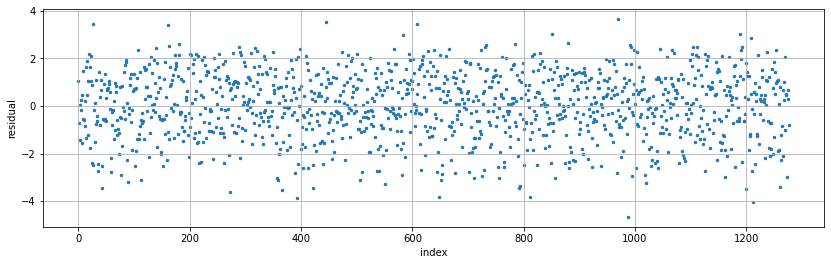

In [6]:
# plot residual:

residual = Y_test - prediction_test # compute residual
residual = pd.DataFrame(residual)   # convert to dataframe
residual.columns = ['residual']     # rename the column of the dataframe
# using original index of the data set is meaningness, because they are are incomlete and randomlized. 
# So we give a new index for the residual data.
residual['index'] = np.arange(len(residual))
# use scatter plot to plot the residuals, the size of the the point is set to be 6 to prevent overlapping
residual.plot(kind='scatter', s = 6,  x= 'index', y='residual',  figsize=(14, 4), grid=True)


# compute probability of redidual being more than 2:

# define a function to compute the probability of the residual being more than 2, and confidence intervals of the probability (with 95% confidence)
def bootstrap_CI(data, N):  # N is the number of tests we take
    prob_2 = np.zeros(N)    # prob_2 refers to the probability of residual being more than 2
    data = np.array(data)

    for n in range(N):
        indices = np.random.randint(0, len(data), len(data)) 
        data_tmp = data[indices]              # randomly pick N points from the data
        # compute the probability of the redisual of the randomly picked data being more than 2 
        prob_2[n] = np.mean(np.abs(data_tmp) > 2) 
    # return the 95% bootstrapped confidence interval
    return np.mean(prob_2), [np.nanpercentile(prob_2, 2.5),np.nanpercentile(prob_2, 97.5)]

probability_mean, probability_CI = bootstrap_CI(residual.residual, 1000) # compute the probability, and bootstrapped confidence interval

print("The probability of the residual beging more than 2 is " + str(probability_mean))
print("The confidence interval for the probability of the residual beging more than 2 is " + str(probability_CI) + 
      ", with 95% bootstrapped confidence")

#### 1.3.4 
**Discuss:** 
In this question, we plan to add these three features to our model. 

The first one is 'has_top_company',  The reason for adding this feature is that employees in top companies tend to have be
more professional on their field, thus they are more likely to produce high-quality papers, which are more likely to get
high scores.

The second one is 'in_arxiv', which is one if the paper has been put in arxiv. We think this feature matters because those
who put their paper in arxiv usually have more confidence in their paper, so that they hope their researches be discovered
by others as soon as possible. So their paper may have a bigger chance of being accepted.

The third one is 'has_top_institution'. The reason for adding this feature is very similar to the feature 'has_top_company'.
We think researchers in top institutions tend to have a very deep understanding on their field, and thus their work is more
likely to be recognized by the reviewers.


In [7]:
X_train_add_f = X_train_std.copy()   # get a copy for X_train_std, add_ refers to 'added features'
X_test_add_f = X_test_std.copy()     # get a copy for X_test_std

# add the features to the training set
X_train_add_f['has_top_company'] = data.loc[random_num_train].has_top_company
X_train_add_f['in_arxiv'] = data.loc[random_num_train].arxiv.astype(int) # transfer 'True' and 'False' to '1' and '0'
X_train_add_f['has_top_institution'] = data.loc[random_num_train].has_top_institution

# add the feature 'multi_categories' to the test set
X_test_add_f['has_top_company'] = data.loc[random_num_test].has_top_company
X_test_add_f['in_arxiv'] = data.loc[random_num_test].arxiv.astype(int)   # transfer 'True' and 'False' to '1' and '0'
X_test_add_f['has_top_institution'] = data.loc[random_num_test].has_top_institution

#### 1.3.5

In [8]:
# including new features, train the model 
model_add_f = LinearRegression() # use linear regression model
model_add_f.fit(X_train_add_f, Y_train) # fit model
prediction_test_add_f = model_add_f.predict(X_test_add_f) # make prediction

R2_add_f = sklearn.metrics.r2_score(Y_test, prediction_test_add_f) # compute R2 score after adding features
print("R2 score after adding feature: " + str(R2_add_f)) # print the R2 score after adding features
print("R2 score before adding feature: " + str(R2))      # print the R2 score after adding features

if R2_add_f > R2:   # if R2 has improved, print the increase
    print("The R2 score has improved by " + str(R2_add_f - R2) + " after adding new features.")

R2 score after adding feature: 0.1455757409625038
R2 score before adding feature: 0.122075502055085
The R2 score has improved by 0.023500238907418813 after adding new features.


### Task 1.4

Experiment with training a different regressor, a [Gradient Boosting Regressor](https://scikit-learn.org/stable/modules/ensemble.html?highlight=xgboost#gradient-boosting). This regressor is analogous to the Gradient Boosting Classifier that you have seen in class. This model performs extremely well for a variety of tasks and is often used in machine learning competitions for tabular data (e.g., on [Kaggle](www.kaggle.com)). You must:

1. Train a Gradient Boosting Regressor without specifying any parameters, e.g. `GradientBoostingRegressor().fit(X, y)`, and report its $R^2$ on the testing set. Your model should again use as features:
    - Median values for the number of author citations, publications and h-indexes as calculated in Task 1.1.1.
    - `reputation` of the last author, as calculated in Task 1.1.2.
2. Create an additional feature called $crazy$, which is derived as follows. If the score  of the paper, $ratings$, is bigger than 4.96, then $crazy = 9 - ratings$, otherwise, $crazy = - ratings$. Train a Gradient Boosting Regressor to predict paper scores using only $crazy$ as a feature. Additionally, train a Linear Regression model to predict paper scores using only $crazy$ as a feature. Report the $R^2$ in the testing set.
3. **Discuss:** Why does the Gradient Boosting Regressor perform so much better?

#### 1.4.1

In [9]:
from sklearn.ensemble import GradientBoostingRegressor

model_gbr = GradientBoostingRegressor()  # use Gradient Boosting Regressor 
model_gbr.fit(X_train_std, Y_train)      # fit model
prediction_test_gbr = model_gbr.predict(X_test_std) # make prediction

R2_gbr = sklearn.metrics.r2_score(Y_test, prediction_test_gbr)  # compute R2 score of Gradient Boosting Regressor
print("R2 score of Gradient Boosting Classifier: " + str(R2_gbr)) # print the R2 score
print("R2 score of Linear Regression: " + str(R2))               # print the R2 score of LinearRegression

if R2_gbr > R2:   # if R2 has improved, print the increase
    print("The R2 score has improved by " + str(R2_gbr - R2) + " using Gradient Boosting Regressor.")

R2 score of Gradient Boosting Classifier: 0.1255237115245852
R2 score of Linear Regression: 0.122075502055085
The R2 score has improved by 0.0034482094695001964 using Gradient Boosting Regressor.


#### 1.4.2

In [10]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# add a column 'crazy'
data['crazy'] = ''

# assign values to 'crazy' by the given formula
for i in range(len(data)):
    if data.ratings[i] > 4.96:
        data['crazy'][i] = 9 - data.ratings[i]
    else:
        data['crazy'][i] = -data.ratings[i]

# initialize a new training set, which only contains the feature 'crazy'
X_train_crazy = pd.DataFrame()
X_test_crazy = pd.DataFrame()
# add the feature 'crazy' to the training set
X_train_crazy['crazy'] = data.loc[random_num_train].crazy
X_test_crazy['crazy'] = data.loc[random_num_test].crazy


# train a Gradient Boosting Regressor using only crazy
model_gbr_crazy = GradientBoostingRegressor()  # use Gradient Boosting Regressor 
model_gbr_crazy.fit(X_train_crazy, Y_train)      # fit model
prediction_test_gbr_crazy = model_gbr_crazy.predict(X_test_crazy) # make prediction

R2_gbr_crazy = sklearn.metrics.r2_score(Y_test, prediction_test_gbr_crazy)  # compute R2 score of Gradient Boosting Regressor
print("R2 score of Gradient Boosting Regressor: " + str(R2_gbr_crazy)) # print the R2 score


# train a Linear Regression model using only crazy
model_lr_crazy = LinearRegression()  # use Linear Regression
model_lr_crazy.fit(X_train_crazy, Y_train)      # fit model
prediction_test_lr_crazy = model_lr_crazy.predict(X_test_crazy) # make prediction

R2_lr_crazy = sklearn.metrics.r2_score(Y_test, prediction_test_lr_crazy)  # compute R2 score of Linear Regression
print("R2 score of Linear Regression: " + str(R2_lr_crazy)) # print the R2 score    

R2 score of Gradient Boosting Regressor: 0.9999982408552437
R2 score of Linear Regression: 0.4136457885477086


#### 1.4.3 
**Discuss:** Why does the Gradient Boosting Regressor perform so much better?  
  
**Answer:** From the defination of the feature 'crazy', it is obvious the relationship between 'crazy' and 'ratings' is not a linear
relationship. Therefore, Linear Regression performs badly on this task (as Linear Regression are usually used for linear
situations). On the other hand, Gradient Boosting Regressor can be used for non-linear cases such as this case. As the 
relationship between 'crazy' and 'ratings' is quiet simple, it is very easy for Gradient Boosting Regressor to learn this
relationship and thus performs much better than Linear Regression.

### Task 1.5

Complex models often have several hyper-parameters. 
To obtain the best results, it is common-place to use a cross-validation set-up in your training data to find the best hyper-parameters, and then use it for the test set.


1. Write modular code (i.e., a function) to divide your training data into $N$ folds and perform cross-validation.
2.  Experiment tuning two hyper-parameters of the Gradient Boosting Regressor: `n_estimators` and `learning_rate`.
For each possible combination of the two hyper-parameters (see below for the range of values that you should try for each hyper-parameter), train your model in a cross-validation setup with $N$=20. Report the mean $R^2$ along with the 90% CI for the 18 scenarios. Notice that you can calculate the 90% CI in a bootstrap-like fashion.
    - `n_estimators`$ \in  \{ 50, 75, 100, 150, 200, 250\}$
    - `learning_rate`$ \in  \{ 0.1, 0.05, 0.01\}$.
3. With the best hyper-parameters obtained, train your model with the entire training set and report the $R^2$ on the testing set.
4. **Discuss:** Why don't we tune the hyper-parameters in the testing set instead of doing cross-validation in the training set?

#### 1.5.1 & 1.5.2

In [11]:
### Your code here! ###
from sklearn.model_selection import cross_val_predict, cross_val_score

# define a function to do cross validation
def cross_validate(n_estimators, learning_rate):
    # use the given n_estimators and learning_rate to build a Gradient Boosting Regressor
    model_gbr_cv = GradientBoostingRegressor(n_estimators = n_est, learning_rate = l_rate)
    # do cross validation with 20 folds, then return the R2 scores of the 20 situations
    R2_scores = cross_val_score(model_gbr_cv, X_train_std, Y_train, cv=20, scoring='r2')
    return R2_scores

n_estimators = [50, 75, 100, 150, 200, 250]
learning_rate = [0.1, 0.05, 0.01]


# max_R2 is defined as the maximum R2 score of the 18 scenarios. It's initialized to be -10 (to guarantee it will be replaced)
max_R2 = -10 
best_n_estimators = None       # the optimal n_estimator (when R2 is maximum)
best_learning_rate = None      # the optimal learning_rate (when R2 is maximum)

# iterate over the 18 scenarios and find the maximum mean R2, and the respective optimal hyper-parameters
print("Now start to iterate over the 18 scenarios")
for n_est in n_estimators:
    for l_rate in learning_rate:
        R2_scores = cross_validate(n_est, l_rate)                     # do cross validation 
        R2_mean = np.mean(R2_scores)                                  # store the mean R2 score in this scenario
        R2_CI = [np.nanpercentile(R2_mean, 5), np.nanpercentile(R2_mean, 95)] # store confidence interval of R2 with 90% confidence
        print("n_estimators = " + str(n_est) + ", learning_rate = " + str(l_rate) + '\n' + "mean R2 is " + str(R2_mean)
             + ", CI for R2 is " + str(R2_CI) + " (90% confidence).")
        if R2_mean > max_R2:   # whenever a larger R2_mean appears, replace max_R2 with this value
            max_R2 = R2_mean
            best_n_estimators = n_est        # find the optimal n_estimators
            best_learning_rate = l_rate      # find the optimal learning_rate

print("The optimal n_estimators is " + str(best_n_estimators) + ". The optimal learning rate is " + str(best_learning_rate))

Now start to iterate over the 18 scenarios
n_estimators = 50, learning_rate = 0.1
mean R2 is 0.08473336267450728, CI for R2 is [0.08473336267450728, 0.08473336267450728] (90% confidence).
n_estimators = 50, learning_rate = 0.05
mean R2 is 0.08584456968378104, CI for R2 is [0.08584456968378104, 0.08584456968378104] (90% confidence).
n_estimators = 50, learning_rate = 0.01
mean R2 is 0.04741826499180128, CI for R2 is [0.04741826499180128, 0.04741826499180128] (90% confidence).
n_estimators = 75, learning_rate = 0.1
mean R2 is 0.08044635177872521, CI for R2 is [0.08044635177872521, 0.08044635177872521] (90% confidence).
n_estimators = 75, learning_rate = 0.05
mean R2 is 0.08437196522835347, CI for R2 is [0.08437196522835347, 0.08437196522835347] (90% confidence).
n_estimators = 75, learning_rate = 0.01
mean R2 is 0.06046335104986893, CI for R2 is [0.06046335104986893, 0.06046335104986893] (90% confidence).
n_estimators = 100, learning_rate = 0.1
mean R2 is 0.07405728330623682, CI for R2 i

#### 1.5.3

In [12]:
# build the model using the optimal hyperparameters we found
model_gbr_opt = GradientBoostingRegressor(n_estimators = best_n_estimators, learning_rate = best_learning_rate)
model_gbr_opt.fit(X_train_std, Y_train)      # fit model

prediction_test_gbr_opt = model_gbr_opt.predict(X_test_std)          # make prediction
R2_opt = sklearn.metrics.r2_score(Y_test, prediction_test_gbr_opt)   # compute R2 score under optimal hyper-parameters

print("Under the optimal hyper-parameters, the R2 score on the test score is " + str(R2_opt) + '\n'
      "In contrast, the R2 score is " + str(R2_gbr) + ", if we don't specify the hyper-parameters")

Under the optimal hyper-parameters, the R2 score on the test score is 0.12881488208034464
In contrast, the R2 score is 0.1255237115245852, if we don't specify the hyper-parameters


#### 1.5.4 
**Discuss:** Why don't we tune the hyper-parameters in the testing set instead of doing cross-validation in the training set?  

**Answer:** Although tuning the hyper-parameters are different from learning the paramers in the model, it can also be viewd as part 
of the learning process (it learns the hyper-parameters). However, we require the test set to be entirely separated from
the learning process. Therefore, we should tune the hyper-parameters by doing cross-validation in the training set 
instead of in the test set.


## _Step 2:_ What influences papers getting accepted?

Time to change hats!

If before we were interested in creating an accurate regressor, now we are interested in understanding what increases the chance of papers getting accepted. 

Typically, in that scenario, simpler models with a clear statistical interpretation (e.g. logistic regression) yield more interesting insights.

For the analysis in this and the next step, you should use [statsmodels](https://www.statsmodels.org/) (for the regressions) and [scipy](https://www.scipy.org/) (for the statistical hypothesis testing).


### Task 2.1

Let's warm up with some visualizations and some hypothesis testing!

1. Plot the distributions of 1) ratings of papers that got accepted in 2020, 2) ratings of papers that got rejected in 2020.
2. Select a statistical test to compare whether the mean for ratings of papers that got accepted in 2020 is significantly higher.
3. **Discuss:** Justify why the statistical test you selected is appropriate. Interpret the test-related statistic and its p-value: concretely, what do they mean?

#### 2.1.1

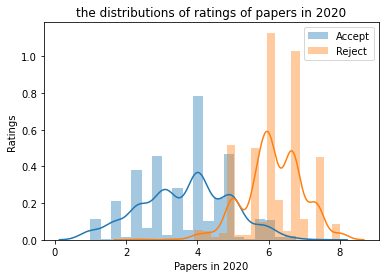

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
data_2020_accept = data.loc[(data.year == 2020) & (data.decisions =='Accept')]     # get the data of papers accpeted in 2020
data_2020_reject = data.loc[(data.year == 2020) & (data.decisions =='Reject')]     # get the data of papers rejected in 2020
ax = sns.distplot(data_2020_reject['ratings'], hist=True, label='Accept');
ax = sns.distplot(data_2020_accept['ratings'], hist=True, label='Reject')
# plot the distributions
ax.set(title='the distributions of ratings of papers in 2020',xlabel='Papers in 2020', ylabel='Ratings')
plt.legend()
plt.show()

#### 2.1.2

In [14]:
#compute the mean value of ratings accepted and rejected in 2020
data_2020_accept_mean = data_2020_accept['ratings'].mean()
data_2020_reject_mean = data_2020_reject['ratings'].mean()
# Here we can have a genral impression of whether the mean for ratings of accepted papers is higher than that of rejected papers
# gap = data_2020_accept_mean - data_2020_reject_mean
# gap = 2.4553579787881756

# This is a two-sided test for the null hypothesis that the ratings of papers got accepted in 2020 have identical values with those got rejected in 2020.
stats.ttest_ind(data_2020_accept['ratings'], data_2020_reject['ratings'])


Ttest_indResult(statistic=45.79777665813106, pvalue=5.21595695e-316)

#### 2.1.3

**Discuss:** Justify why the statistical test you selected is appropriate. Interpret the test-related statistic and its p-value: concretely, what do they mean?

**Answer:** At first we compute the mean value of ratings of papers that got accepted and rejected in 2020 respectively. And we can see there is about a 2.5 score gap. Then we use a t-test, which is a two-sided test for the null hypothesis that the two independent samples have identical average (expected) values.

As for the statistic in the output,it measures the size of the difference relative to the variation in sample data.  The greater the magnitude of T, the greater the evidence against the null hypothesis.
Here, p_value < 0.05, we can reject the null hypothesis, so we can get the conclusion that there is significant difference between the two varaibles.

### Task 2.2

We will now carry out a logistic regression modeling the binary variable `decisions` as a function of the continuous variable `ratings` and an intercept. 

Recall that a logistic regression is a model in the form:

$$
\log \Big( \frac{p}{1-p} \Big) = b_0 + b_1x_1 + b_2x_2 + \ldots
$$

Where $p$ is the probability of the dependent variable (here, `decisions`) being equals to 1. 
Note that $\frac{p}{1-p}$ represents the odds of the variable, and thus, on the left-hand side we have the log-odds of the variable.
This can be also written as:

$$
\Big( \frac{p}{1-p} \Big) = e^{b_0 + b_1 x_1 + b_2 x_2 + \ldots} =  e^{b_0} e^{b_1 x_1} e^{b_2 x_2} \ldots
$$

Given a linear variable, say $x_1$, if we increase the value associated with this variable by a single unit, and keep everything constant, we have:

$$
 e^{b_1(x_1+1)} =  e^{b_1 x_1 + b_1} = e^{b_1 x_1}e^{b_1}  
$$

This means that we multiply the odds of the outcome variable by $e^{b_1}$. Thus, let's say that $x_1$ is the average rating, and $\beta_1$ is the associated coefficient. Also, let's assume that $\beta_1$ equals 2. In that case, increasing the score of the paper by 1 unit is equivalent to multiplying both sides of the previous equation by $e^{b_1}$. The original equation for our model becomes:

$$
\Big( \frac{p}{1-p} \Big) = e^{b_0} e^{b_1 x_1} 
$$
$$
\Big( \frac{p}{1-p} \Big) e^{b_1}  = e^{b_0} e^{b_1 x_1} e^{b_1}
$$

Since $b_1=2$, we have that this is the same as multiplying the odds of the variable by $e^2\approx7$. 
So for example, if a paper with a score 5 had $p=0.05$ of being approved, its odds would be $0.05/0.95\approx0.052$. According to our model, an increase in 1-rating point would mean that the new odds would be $0.052*7\approx0.36$. Using the odds formula  ($\frac{p}{1-p}$), this suggests that this paper would have a chance of $0.56$ of being accepted.

---

This is the theory. Now, let's find out what the real world looks like.


1. Fit a logistic regression model to our data considering as the training set all papers submitted in 2020. Your model should predict a binary variable related to decisions (which equals true if the paper was accepted and false otherwise) as a function of the paper ratings and an intercept. In mathematical notation:
$$
d = b_0 + r b_1
$$
Where $d$ is the binary variable corresponding to a decision, $r$ is a numeric variable corresponding to the rating a paper has received and $b$ are coefficients.
Notice that here we have no testing set!
Report the summary of your model. 
2. **Discuss:** Interpreting the coefficients of your model, calculate the probability that a paper with a score 7 will be accepted.


#### 2.2.1

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

data_2020 = data.loc[data.year == 2020]

# data standardization for continuous variables
means = data_2020['ratings'].mean()
stddevs = data_2020['ratings'].std()
data_2020['ratings'] = (data_2020['ratings'] - means) / stddevs
# Turn bool type decisions to 1 or 0 
data_2020.decisions[data_2020.decisions=='Accept']=1
data_2020.decisions[data_2020.decisions=='Reject']=0
# Turn object type to int type
data_2020['decisions'] = pd.to_numeric(data_2020['decisions']) 

# logistic regression model. 
# Dependent variable is 'decisions',independent variables is 'ratings'
mod = smf.logit(formula='decisions ~  ratings ', data=data_2020)
res = mod.fit()
print(res.summary())


Optimization terminated successfully.
         Current function value: 0.251882
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              decisions   No. Observations:                 2052
Model:                          Logit   Df Residuals:                     2050
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Nov 2020   Pseudo R-squ.:                  0.5913
Time:                        20:44:28   Log-Likelihood:                -516.86
converged:                       True   LL-Null:                       -1264.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3803      0.129    -18.428      0.000      -2.633      -2.127
ratings        3.7693      0.

#### 2.2.2
**Discuss:** Interpreting the coefficients of your model, calculate the probability that a paper with a score 7 will be accepted.

**Answer:** We can say that the coefficient for ratings is the difference in the log odds. In other words, for a one-unit increase in the standarized rating score, the expected change in log odds is 3.7693. We need to be careful that the score here represents score which has already been standardized.

When there is a paper with score 7, we need to use the means and standard deviation already computed to standardize it.The code is as follows:

`score_std =(7-means)/stddevs
b0 = -2.3803 
b1 = 3.7693
log_odds = b1*score_std+b0
pr=np.exp(log_odds)/(1+np.exp(log_odds))`

Then we can get the probability that a paper with a score 7 will be accepted is 0.976

### Task 2.3

Our model is not so interesting since the only independent variable (that is, our model' feature or predictor) is something blatantly associated with paper acceptance. Let's go further! 

1. Run a logistic regression with the binary decision as the dependent variable (the outcome) and using as independent variables (the features): ratings, the reputation of the last author, and whether the paper was on arxiv or not. That is, in [patsy-style formula](https://patsy.readthedocs.io/en/latest/formulas.html): `decisions ~ ratings + reputation + arxiv` (variable names do not need to be exactly these). Consider all papers submitted in 2020 as your training data.
Notice that reputation was calculated in Task 1.1. 
2. **Discuss:** Unlike `ratings` and `reputation`, the variable `arxiv` is binary. Following the same logic as we did for continuous variables in the text of Task 2.2, interpret the meaning of this coefficient. What happens to the odds ratio if the paper was seen in arxiv? Is this effect statistically significant?

#### 2.3.1

In [16]:
#data standardization for 'last_author_reputation'
data_2020['last_author_reputation'] = (data_2020['last_author_reputation'] - data_2020['last_author_reputation'].mean())/data_2020['last_author_reputation'].std()
# Turn bool type ‘arxiv’ to 1 or 0 
data_2020['arxiv'] = pd.get_dummies(data_2020['arxiv']==False)

# logistic regression model. 
# Dependent variable is 'decisions',independent variables are 'ratings','last_author_reputation','arxiv'
mod = smf.logit(formula='decisions ~  ratings + last_author_reputation + C(arxiv) ', data=data_2020)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.250412
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              decisions   No. Observations:                 2052
Model:                          Logit   Df Residuals:                     2048
Method:                           MLE   Df Model:                            3
Date:                Fri, 20 Nov 2020   Pseudo R-squ.:                  0.5937
Time:                        20:44:28   Log-Likelihood:                -513.85
converged:                       True   LL-Null:                       -1264.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -2.4865      0.143    -17.420      0.000      -2.766      

#### 2.3.2

**Discuss:** Unlike ratings and reputation, the variable arxiv is binary. Following the same logic as we did for continuous variables in the text of Task 2.2, interpret the meaning of this coefficient. What happens to the odds ratio if the paper was seen in arxiv? Is this effect statistically significant?

**Answer:** The coefficient for arxiv is the log of odds ratio of being accepted between the group of paper which was spotted in a pre-print server around the submission period and which was not spotted in a pre-print server around the submission. 
If the papre was seen in arxiv,the log of odds ratio would get an increase of the coefficient for arxiv.  
This effect is not statistically significant because the p value is more than 0.05.

### Task 2.4

Let's finally move on to the question that you have been dying to answer: Do pre-prints favor top institutions? 

In order to (try to) answer that question, you must fit yet another logistic regression.

Your regression should have the paper decision as the dependent variable, and `ratings`, `reputation`, and `arxiv` as independent variables just like in task 2.3. Yet, here, include also as independent variables the binary variable `has_top_institution`, which equals 1 if the paper has an author in a top-10 institution; and the interaction variable `arxiv:has_top_institution`, which equals one only if the paper is from a top-10 institution **and** if it appeared on arxiv before the submission deadline. In patsy-style formula your model should look something like: 

`decisions_bool ~ ratings + reputation + arxiv + has_top_institution + arxiv:has_top_institution`


1. Fit this model and estimate the effect of posting on arxiv for a top institution. Again, consider only papers submitted in the 2020 edition.
2. **Discuss:** Interpreting the p-values, discuss: is this evidence that arxiv breaks double-blind submissions?

#### 2.4.1

In [17]:
# logistic regression model. 
# Dependent variable is 'decisions',
# Independent variables are 'ratings','last_author_reputation','arxiv','has_top_institution' 
# and interaction term of the arxiv','has_top_institution' 

mod = smf.logit(formula='decisions ~  ratings + last_author_reputation + C(arxiv) * C(has_top_institution)', data=data_2020)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.247288
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              decisions   No. Observations:                 2052
Model:                          Logit   Df Residuals:                     2046
Method:                           MLE   Df Model:                            5
Date:                Fri, 20 Nov 2020   Pseudo R-squ.:                  0.5988
Time:                        20:44:28   Log-Likelihood:                -507.43
converged:                       True   LL-Null:                       -1264.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -

#### 2.4.2

**Discuss:** Interpreting the p-values, discuss: is this evidence that arxiv breaks double-blind submissions?

**Answer:** According to p values, ratings are significant positive predictor of being accepted because it's less than 0.05. 'has_top_institution' can influence the decision but not significantly, because the p value is around 0.01.

I think this can be the evidence that arxiv breaks double-blind submissions. 

The coefficient for has_top_institution(0.367) is the effect of has_top_institution when arxiv = 0. The coefficient for interaction term plus the coefficient(0.367+0.579=0.95) for  has_top_institution means the the effect of has_top_institution  when the 'arxiv'=1,
The coeffcient of being accepted is higher when arxiv=1 than when arxiv = 0, so it might be the evidence that it breaks double-blind submissions.


## Step 3: Matching

Okay, so let's change hats one last time.

As you have all seen in class, a particularly powerful way of disentangling causal effects from observational data is through matching: making sure we are not comparing apples to oranges.


### Task 3.1

One of the ways to do matching is called "Propensity Score Matching." There, we calculate a *propensity score* for each subject which represents the propensity to receive a "treatment." Then, we match subjects who received and did not receive the treatment, but that had similar propensity scores (that is, even though some received the treatment and some did not, they had similar chances to receive it).

In our specific case, we can further attempt to study the impact of pre-prints by considering publishing to arxiv as our "treatment".

In that context, the first step to perform propensity score matching is to create a classifier that predicts whether a paper was published on arxiv or not.

1. We have trained this classifier for you (don't get spoiled!). You may load the pandas dataframe entitled `propensity_scores.csv.gz` from the github repo. 
Notice that we will be using only the articles published in 2020. 
Create a new dataframe that is a merged version of this new dataframe with the dataframe you have been working on so far. Remember to keep only the papers published in 2020!
2. **Discuss:** In which way is this classifier (that is a classifier trained to estimate propensity scores) different from the previous classifier that you trained in Step 1?

**Hint:** For a classifier tra we don't need a training set and a test set!


#### 3.1.1

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

propensity_score = pd.read_csv("./data/propensity_scores.csv.gz")
data_2020 = data_2020.merge(propensity_score)
# read the propensity_scores dataframe and merge the propensity with the data of 2020

data_2020.head(3)

,year,paper,authors,ratings,decisions,institution,csranking,categories,authors_citations,authors_publications,authors_hindex,arxiv,authors_citation_median,authors_publication_median,authors_hindex_median,last_author_reputation,has_top_company,has_top_institution,crazy,propensity_score
0,2020,Pitfalls of In-Domain Uncertainty Estimation a...,Arsenii Ashukha;Alexander Lyzhov;Dmitry Molcha...,1.400988,1,Samsung;Skolkovo Institute of Science and Tech...,-1;-1;-1;481,0,488;12;481;2097,14;2;17;124,8;1;7;16,0,484.5,15.5,7.5,-0.036821,0,0,2.33333,0.360486
1,2020,An Inductive Bias for Distances: Neural Nets t...,Silviu Pitis;Harris Chan;Kiarash Jamali;Jimmy Ba,1.453324,1,"Department of Computer Science, University of ...",18;18;18;18,1;10,15;23;3;52924,9;13;3;56,2;3;1;22,0,19.0,11.0,2.5,2.732480,0,0,2.25,0.567842
2,2020,Stochastic AUC Maximization with Deep Neural N...,Mingrui Liu;Zhuoning Yuan;Yiming Ying;Tianbao ...,0.982298,1,University of Iowa;University of Iowa;State Un...,154;154;266;154,9,238;112;2144;3236,29;12;64;187,9;4;24;29,1,1191.0,46.5,16.5,-0.020988,0,0,3,0.334322


#### 3.1.2 
**Discuss:** In which way is this classifier (that is a classifier trained to estimate propensity scores) different from the previous classifier that you trained in Step 1?  
  
**Answer:** The classifier in step 1 uses as many features as possible to make the regressor more accurate. The main purpose to training the classifiers is to make prediction with the unknown data out of the dataset and the dataset is split to training set and test set for training and test respectively. However, the classifier trained to estimate propensity score uses all datapoints in the dataset and return a propensity score for each data point. It calculate the probability of receiving teh treatment of each data point with pre-treatment features by logistic regression. It's not used for prediction but data analysis inside the whole dataset to balance the sampling difference between treated group and non-treated group. 


### Task 3.2

Now is time to match users! You will be implementing a technique called *caliper matching*. 

Create pairs of users as follows. For each treated subject (here a paper that was submitted to arxiv), find a non-treated subject (a paper that was not submitted to arxiv) with similar propensity score. Namely, if the propensity score of the treated unit is $p_t$, you must find a non-treated unit $p_c$ with propensity score $|p_{c} - p_t| < \epsilon$. If there is no such a non-treated unit, you may ignore the treated unit and move forward with the matching. Notice that your output must be a 1-to-1 matching. So each paper can only be matched once.

1. Perform this matching procedure using $\epsilon = 0.05$.
2. Report how many pairs did you manage to match? How many didn't you?

#### 3.2.1

In [19]:
def matching(t_ind, c_ind, epsilon, matched_dict, treated_dict, control_dict):
    '''find matched couples of treated and nontreated with propensity score deviation less than 𝜖,
       using greedy algorithms and store the index of matched couples in a dictionary.
    '''
    p_dev = np.abs(treated_dict[t_ind]-control_dict[c_ind])
    if  p_dev < epsilon:
        if t_ind not in matched_dict.keys() and c_ind not in matched_dict.values():
            # add new matched couples' index
            matched_dict[t_ind] = c_ind 
        elif t_ind in matched_dict.keys() and c_ind not in matched_dict.values() and \
                p_dev < np.abs(treated_dict[t_ind]-control_dict[matched_dict[t_ind]]):
            # optimize for best matching for each treaed sample
            matched_dict[t_ind] = c_ind
        elif t_ind not in matched_dict.keys() and c_ind in matched_dict.values():
            # ensure 1-1 matching (the control sample can only be used once)
            pass


# divided all the paper in 2020 into the treatment and control group
# store the index and the propensity score in a dictionary 
treated_dict = data_2020[data_2020['arxiv'] == 1].propensity_score.to_dict()
control_dict = data_2020[data_2020['arxiv'] == 0].propensity_score.to_dict()

# Create a dict to store matched samples' index
matched_dict = dict()
# set the value of 𝜖
epsilon = 0.05
# Loop through all the treated and contraol samples
for t_ind in treated_dict.keys():
    for c_ind in control_dict.keys():
        matching(t_ind, c_ind, epsilon, matched_dict, treated_dict, control_dict)

#### 3.2.2 

In [20]:
# Report how many pairs did you manage to match? How many didn't you?  
  
print("We managed to match {0} pairs of treated and control samples.\
{1} out of {2} treated sample are not matched and {3} out of {4} control samples are not matched."\
      .format(len(matched_dict),len(treated_dict)-len(matched_dict),len(treated_dict),len(control_dict)-len(matched_dict),len(control_dict)))


We managed to match 590 pairs of treated and control samples.0 out of 590 treated sample are not matched and 872 out of 1462 control samples are not matched.


### Task 3.3

Let's evaluate your matching! There are more rigorous ways to do it, but we'll go the easy path.


1. Using one or several appropriate plot types, visualize the distributions of the variables reputation and ratings, for treated and non-treated subjects that you matched.
2. Visualize the distributions of these variables for all papers from 2020 that appeared on arxiv, and all papers that did not (including those you did not manage to match).
3. **Discuss:** According to your visual analysis (no statistical tests needed here), did the matching do a good job at balancing covariates?

#### 3.3.1 & 3.3.2

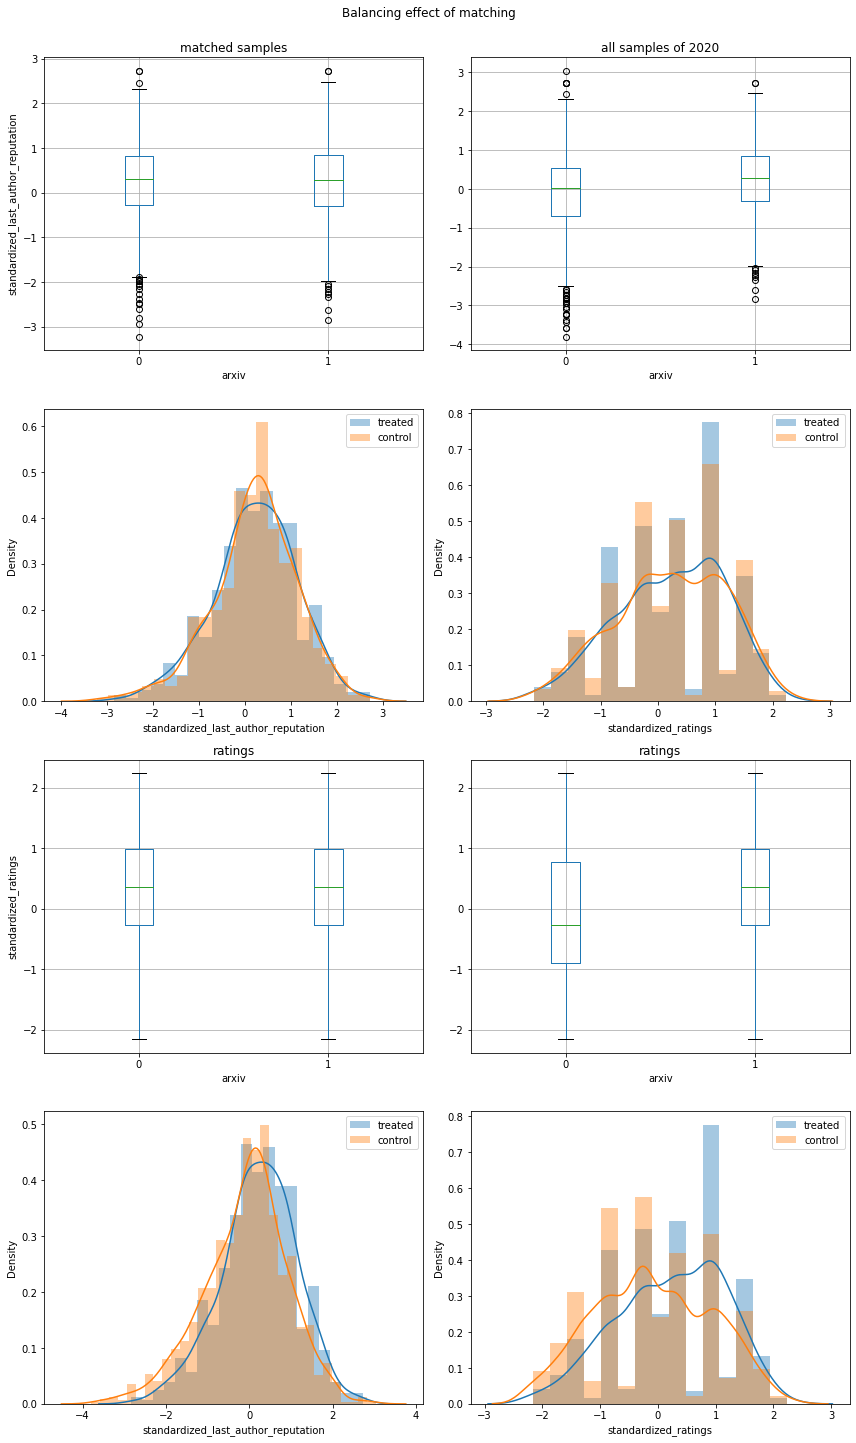

In [21]:
# index number for all matched samples
matched_index = list(matched_dict.keys())+list(set(matched_dict.values()))

# plot the boxplot and distribution of the variables: reputation and ratings
fig, axs = plt.subplots(4,2, figsize=(12,20))
data_2020.loc[matched_index].boxplot(by='arxiv', column='last_author_reputation', grid=True, ax=axs[0,0])
axs[0,0].set_title("matched samples")
axs[0,0].set_ylabel("standardized_last_author_reputation")

data_2020.boxplot(by='arxiv', column='last_author_reputation', grid=True, ax=axs[0,1])
axs[0,1].set_title("all samples of 2020")

sns.distplot(data_2020.loc[list(matched_dict.keys())]['last_author_reputation'], hist=True, label='treated', ax=axs[1,0])
sns.distplot(data_2020.loc[list(matched_dict.values())]['last_author_reputation'], hist=True, label='control', ax=axs[1,0])
axs[1,0].set_xlabel("standardized_last_author_reputation")
axs[1,0].legend()

sns.distplot(data_2020.loc[list(matched_dict.keys())]['ratings'], hist=True, label='treated', ax=axs[1,1])
sns.distplot(data_2020.loc[list(matched_dict.values())]['ratings'], hist=True, label='control', ax=axs[1,1])
axs[1,1].set_xlabel("standardized_ratings")
axs[1,1].legend()

data_2020.loc[matched_index].boxplot(by='arxiv', column='ratings', grid=True, ax=axs[2,0])
axs[2,0].set_ylabel("standardized_ratings")

data_2020.boxplot(by='arxiv', column='ratings', grid=True, ax=axs[2,1])

sns.distplot(data_2020[data_2020['arxiv'] == 1]['last_author_reputation'], hist=True, label='treated', ax=axs[3,0])
sns.distplot(data_2020[data_2020['arxiv'] == 0]['last_author_reputation'], hist=True, label='control', ax=axs[3,0])
axs[3,0].set_xlabel("standardized_last_author_reputation")
axs[3,0].legend()

sns.distplot(data_2020[data_2020['arxiv'] == 1]['ratings'], hist=True, label='treated', ax=axs[3,1])
sns.distplot(data_2020[data_2020['arxiv'] == 0]['ratings'], hist=True, label='control', ax=axs[3,1])
axs[3,1].set_xlabel("standardized_ratings")
axs[3,1].legend()

fig.tight_layout()
fig.suptitle("Balancing effect of matching",x=0.5,y=1)
plt.show()

#### 3.3.3
**Discuss:** According to your visual analysis (no statistical tests needed here), did the matching do a good job at balancing covariates?  
  
**Answer:** From the boxplt, we can see the imbalance of the variables was significantly mitigated by matching compared with all the paper in 2020. But from the distribution plot, we can still see some ignorable difference between the treated and control group. Overall, matching mostly did a good job in balancing covariates, but not a totally perfect work.

### Task 3.4

Finally, it's time to estimate the treatment effect. Given that we have pairs of matched samples, one that received treatment and one that did not, and that they have associated outcomes $y_{treat}$ and $y_{\neg treat}$. We can calculate the average treatment effect as:

$$
ATE = \frac{1}{N} \sum_i^N  y_{treat}^{(i)} - y_{\neg treat}^{(i)}
$$

Notice that here the outcome is a simple binary variable which equals 1 if the paper has been accepted and equals 0 if the paper has been rejected, and $N$ is the total number of matched samples in our analysis.

According to your matched sample, estimate the treatment effect of publishing a paper on arxiv. Report the 95% CI through bootstrapping.


In [22]:
def bootstrap_CI(y_devs, sampling_times):
    '''using bootstrapping samples to calculate the 95% confidence interval'''
    ATE_means = np.zeros(sampling_times)
    y_devs = np.array(y_devs)

    for s in range(sampling_times):
        index = np.random.randint(0, len(y_devs), len(y_devs))
        y_devs_tmp = y_devs[index] 
        ATE_means[s] = np.nanmean(y_devs_tmp)

    return [np.nanpercentile(ATE_means, 2.5),np.nanpercentile(ATE_means, 97.5)]

# extract the index for matched_treated and matched_control group respectively 
matched_treated_index = list(matched_dict.keys())
matched_control_index = list(matched_dict.values())

# extract decision values as y value 
y_treated = data_2020.loc[matched_treated_index].decisions
y_control = data_2020.loc[matched_control_index].decisions

# calculate the ATE value and with 95% CI 
y_devs = y_treated.values-y_control.values
ATE = y_devs.mean()
ATE_bootstrap_CI = bootstrap_CI(y_devs, 1000)
print("The the treatment effect of publishing a paper on arxiv (ATE) for matched sample pairs is {0}, \
with 95% CI from {1} to {2}".format(ATE,ATE_bootstrap_CI[0],ATE_bootstrap_CI[1]))

The the treatment effect of publishing a paper on arxiv (ATE) for matched sample pairs is 0.03559322033898305, with 95% CI from -0.006822033898305082 to 0.08139830508474571


### Task 3.5

Wait, but what about prestigious institutions? 

1.  To understand what is going on there, repeat tasks 3.2 to 3.4 considering *only* the top 10 institutions. Notice that you can use the same propensity scores and re-do the steps in a reduced dataframe containing only top-institutions.
2. **Discuss:** Is this evidence that arxiv breaks double-blind submissions?

#### 3.5.1 matching (3.2)

In [23]:
# divided all the paper pubulished by top 10 institutions in 2020 into the treatment and control group
# store the index and the propensity score in a dictionary 
data_2020_topins = data_2020[data_2020['has_top_institution'] == 1]
treated_dict_topins = data_2020_topins[data_2020['arxiv'] == 1].propensity_score.to_dict()
control_dict_topins = data_2020_topins[data_2020['arxiv'] == 0].propensity_score.to_dict()

# Create a dict to store matched samples' index
matched_dict_topins = dict()
# set the value of 𝜖
epsilon = 0.05
# Loop through all the treated and contraol samples
for t_ind in treated_dict_topins.keys():
    for c_ind in control_dict_topins.keys():
        matching(t_ind, c_ind, epsilon, matched_dict_topins, treated_dict_topins, control_dict_topins)

# Report how many pairs did you manage to match? How many didn't you?  
  
print("We managed to match {0} pairs of treated and control samples.\
{1} out of {2} treated sample are not matched and {3} out of {4} control samples are not matched."\
      .format(len(matched_dict_topins),len(treated_dict_topins)-len(matched_dict_topins),\
              len(treated_dict_topins),len(control_dict_topins)-len(matched_dict_topins),len(control_dict_topins)))
     

We managed to match 161 pairs of treated and control samples.0 out of 161 treated sample are not matched and 200 out of 361 control samples are not matched.


#### 3.5.1 plot distribution (3.3)

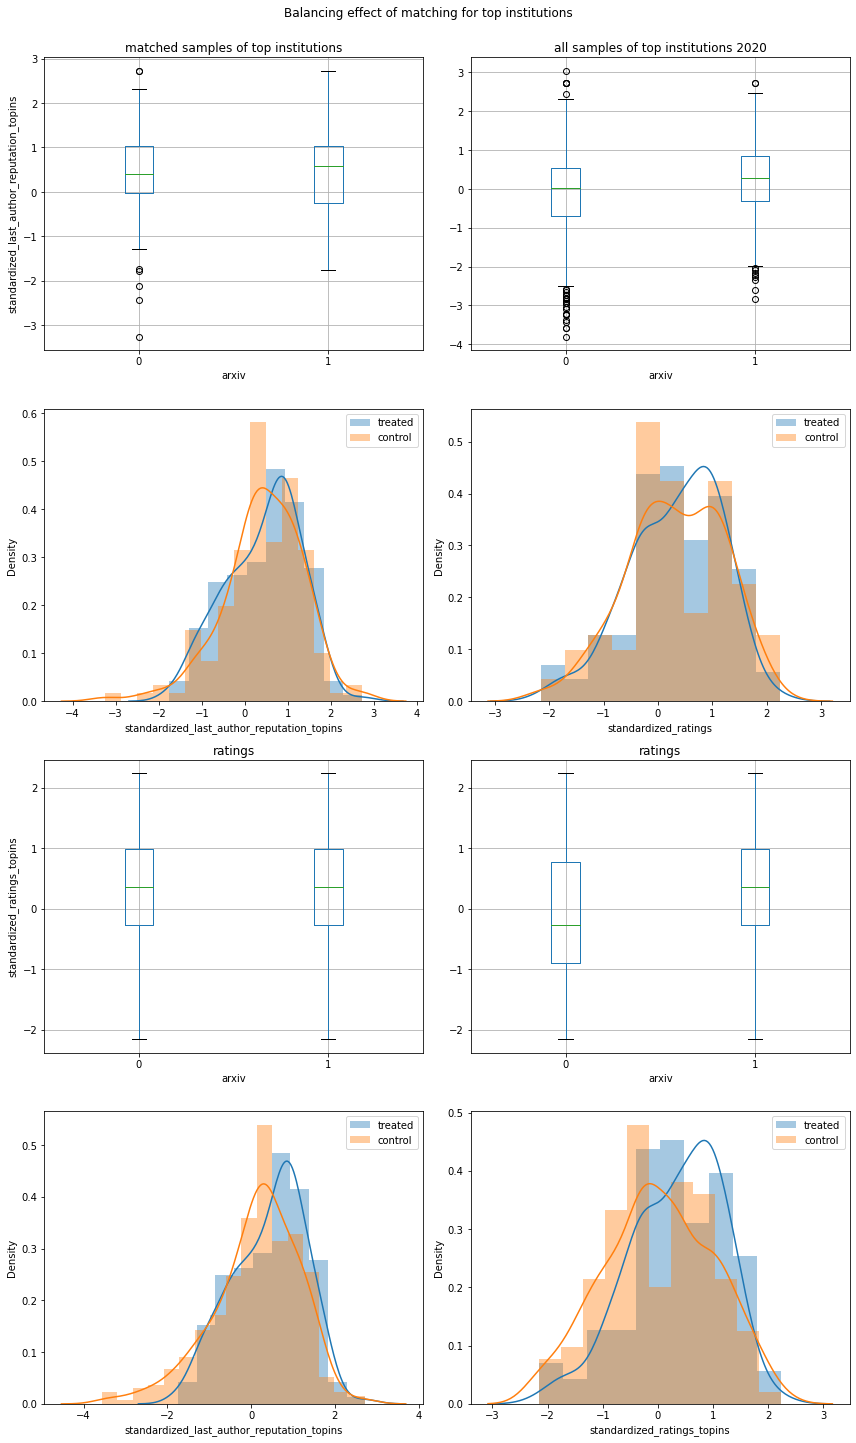

In [24]:
# index number for all matched samples
matched_index_topins = list(matched_dict_topins.keys())+list(set(matched_dict_topins.values()))

# plot the boxplot and distribution of the variables: reputation and ratings 
fig, axs = plt.subplots(4,2, figsize=(12,20))
data_2020.loc[matched_index_topins].boxplot(by='arxiv', column='last_author_reputation', grid=True, ax=axs[0,0])
axs[0,0].set_title("matched samples of top institutions")
axs[0,0].set_ylabel("standardized_last_author_reputation_topins")

data_2020.boxplot(by='arxiv', column='last_author_reputation', grid=True, ax=axs[0,1])
axs[0,1].set_title("all samples of top institutions 2020")

sns.distplot(data_2020_topins.loc[list(matched_dict_topins.keys())]['last_author_reputation'], hist=True, label='treated', ax=axs[1,0])
sns.distplot(data_2020_topins.loc[list(matched_dict_topins.values())]['last_author_reputation'], hist=True, label='control', ax=axs[1,0])
axs[1,0].set_xlabel("standardized_last_author_reputation_topins")
axs[1,0].legend()

sns.distplot(data_2020_topins.loc[list(matched_dict_topins.keys())]['ratings'], hist=True, label='treated', ax=axs[1,1])
sns.distplot(data_2020_topins.loc[list(matched_dict_topins.values())]['ratings'], hist=True, label='control', ax=axs[1,1])
axs[1,1].set_xlabel("standardized_ratings")
axs[1,1].legend()

data_2020_topins.loc[matched_index_topins].boxplot(by='arxiv', column='ratings', grid=True, ax=axs[2,0])
axs[2,0].set_ylabel("standardized_ratings_topins")

data_2020.boxplot(by='arxiv', column='ratings', grid=True, ax=axs[2,1])

sns.distplot(data_2020_topins[data_2020_topins['arxiv'] == 1]['last_author_reputation'], hist=True, label='treated', ax=axs[3,0])
sns.distplot(data_2020_topins[data_2020_topins['arxiv'] == 0]['last_author_reputation'], hist=True, label='control', ax=axs[3,0])
axs[3,0].set_xlabel("standardized_last_author_reputation_topins")
axs[3,0].legend()


sns.distplot(data_2020_topins[data_2020_topins['arxiv'] == 1]['ratings'], hist=True, label='treated', ax=axs[3,1])
sns.distplot(data_2020_topins[data_2020_topins['arxiv'] == 0]['ratings'], hist=True, label='control', ax=axs[3,1])
axs[3,1].set_xlabel("standardized_ratings_topins")
axs[3,1].legend()

fig.tight_layout()
fig.suptitle("Balancing effect of matching for top institutions",x=0.5,y=1)
plt.show()

#### 3.5.1 ATE calculation (3.4)

In [25]:
# extract the index for matched_treated and matched_control group respectively 
matched_treated_index_topins = list(matched_dict_topins.keys())
matched_control_index_topins = list(matched_dict_topins.values())

# extract decision values as y value 
y_treated_topins = data_2020.loc[matched_treated_index_topins].decisions
y_control_topins = data_2020.loc[matched_control_index_topins].decisions

# calculate the ATE value and with 95% CI 
y_devs_topins = y_treated_topins.values-y_control_topins.values
ATE_topins = y_devs_topins.mean()
ATE_bootstrap_CI_topins = bootstrap_CI(y_devs_topins, 1000)

print("The the treatment effect of publishing a paper on arxiv (ATE) for matched sample pairs is {0}, \
with 95% CI from {1} to {2}".format(ATE_topins,ATE_bootstrap_CI_topins[0],ATE_bootstrap_CI_topins[1]))

The the treatment effect of publishing a paper on arxiv (ATE) for matched sample pairs is 0.09937888198757763, with 95% CI from 0.006211180124223602 to 0.18633540372670807


#### 3.5.2 plot comparison 

Text(0, 0.5, 'ATE')

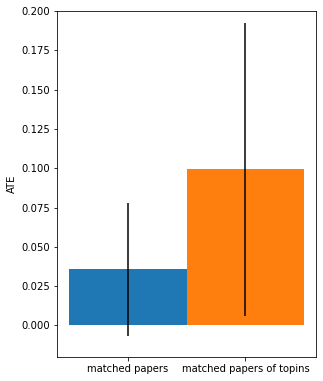

In [26]:
# plot the barchart of ATE for matched papers and matched papers of top institutions 
ATE_plot = plt.axes([0, 0, 0.6, 1.2], ylim=(-0.02,0.2))
width =0.35
ATE_plot.bar(0 - width/2,
        height=ATE,
        width=width,
        yerr=np.array(ATE-ATE_bootstrap_CI[0],ATE_bootstrap_CI[1]-ATE),
        label='matched')
ATE_plot.bar(0 + width/2,
        height=ATE_topins,
        width=width,
        yerr=np.array(ATE_topins-ATE_bootstrap_CI_topins[0],ATE_bootstrap_CI_topins[1]-ATE_topins),
        label='matched_topins')

label=['matched papers','matched papers of topins']
ATE_plot.set_xticks([0 - width/2, 0 + width/2])
ATE_plot.set_xticklabels(label)
ATE_plot.set_ylabel('ATE')

#### 3.5.2 
**Discuss:** Is this evidence that arxiv breaks double-blind submissions?  
  
**Answer:**  
From the chart above, we can see that after matching, the result shows that who pre-published their paper on arxiv have a higher probability of 3.6% (95% CI: -0.7% ~ 8.1%) to be accepted. While the lower bounder of 95% CI is less than 0, this is a quite small imbalance may caused by the limit of samples, with only 590 pairs. Or there really exists such slight imbalance.  
But for the papers published by top institutions, the imbalance is not ignorable. In 161 pairs of matched samples, it shows that the paper with top institution participation has a higher probability of 9.9% (95% CI: 0.6% ~ 18.6%) to be accepted, which is strong enough to conclude that the pre-publish of papers supported by top institutions break the double-blind submission.